In [1]:
import scipy
import seaborn as sns
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.style.use("ggplot")

In [2]:
db = pd.read_csv("ytdaily/BR_youtube_trending_data.csv")

# Análise Exploratória

## Banco de Dados

Utilizamos nesse trabalho um banco de dados que contém informações sobre os vídeos que entraram em trending no youtube entre o período de 2018-2021. Nossos dados contêm informações como o ID do vídeo no youtube, seu título, categoria e o canal de origem, assim como data de publicação e data de trend, número de comentários, likes e dislikes e contagem de views.

Nosso objetivo com a análise desse banco de dados é identificar algumas características similares dos vídeos do banco de dados para que possamos entender melhor sobre quais características são mais correlacionadas com o sucesso do vídeo na plataforma ou em seu engajamento social.

In [3]:
db

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e..."
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38788,Uy4_C6Ev8S8,"Sam Fischer, Demi Lovato - What Other People S...",2021-02-16T16:00:19Z,UCkW1W1_0rANDKlAa3HYwmXA,SamFischerVEVO,10,2021-02-25T00:00:00Z,sam fischer|demi lovato|demi|what other people...,3133410,167396,1557,8033,https://i.ytimg.com/vi/Uy4_C6Ev8S8/default.jpg,False,False,Sam Fischer & Demi Lovato – What Other People ...
38789,JM-NqFX2jU8,DOTA: Dragon's Blood | Date Announcement | Net...,2021-02-17T00:00:00Z,UCWOA1ZGywLbqmigxE4Qlvuw,Netflix,24,2021-02-25T00:00:00Z,Dota Dragon's Blood|Ashley Miller|Valve Studio...,2679121,75437,4159,10175,https://i.ytimg.com/vi/JM-NqFX2jU8/default.jpg,False,False,"The story you've been waiting for, is finally ..."
38790,jR681pwWPm0,"Deve ter sentido que no São Paulo É DIFERENTE,...",2021-02-16T23:26:19Z,UCcndglQZmXnYjgE_Grqt5yg,Gazeta Esportiva,17,2021-02-25T00:00:00Z,gazeta esportiva|GAZETA ESPORTIVA DE HOJE|notí...,151552,4428,101,304,https://i.ytimg.com/vi/jR681pwWPm0/default.jpg,False,False,O recém chegado novo técnico do Tricolor teve ...
38791,Zk5qMdv_BCc,TROLLEI O VICTOR FALANDO QUE ESTOU GOSTANDO DELE,2021-02-15T18:27:12Z,UCpO4C7n86oFyCtlpiVPtcDA,By Pamella,24,2021-02-25T00:00:00Z,pamella libbre|bypamella|entretenimento|videos...,2444745,420309,2722,12439,https://i.ytimg.com/vi/Zk5qMdv_BCc/default.jpg,False,False,"Iae galera, bem vindos a mais um vídeo do cana..."


## Características Importantes

As informações que serão mais utilizadas durante nossa análise dos dados serão:
   * view_count : Principal parâmetro para determinar o sucesso do vídeo dentro dos trendings, a contagem de visualizações determinaria o alcance no vídeo na plataforma.
   * publishedAt | trending_date : A data de publicação e trending dos vídeos nos permite fazer algumas análises sobre o impacto da época do ano, hora do dia, no desempenho do vídeo. Podemos assim, traçar uma certa correlação entre horários e datas que impulsionam ou detrimentam a performance.
   * categoryId : A partir do id da categoria podemos traçar quais as categorias são favorecidas pela plataforma para alcançar o status de trending.
   * tags : As tags são ferramentas que os criadores de conteúdos podem utilizar para realizar conexões entre o conteúdo deles e conteúdo de outrem, e a partir da informação delas queremos traçar o impacto que as tags e sua quantidade realizam no desempenho do vídeo
   * interactions | likes | dislikes : Representantes do engajamento com o vídeo por parte da comunidade, os likes e os dislikes, assim como seu ratio podem nos fornecer a capacidade de identificar qual o poder do marketing negativo na plataforma, (falem bem ou falem mal mas falem de mim), assim como verificar qual o impacto que os comentários podem fazer na percepção do vídeo.
   * comment_count | comment_disable: Os comentários são a voz da comunidade sobre o vídeos em questão, a partir do número de comentários gostariamos verificar uma relação entre eles e o ratio de likes e dislikes do vídeo na plataforma.

In [4]:
print("A view_count dos vídeos do banco de Dados")
db[["title", "view_count"]]

A view_count dos vídeos do banco de Dados


,title,view_count
0,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,263835
1,ITZY “Not Shy” M/V TEASER,6000070
2,Oh Juliana PARÓDIA - MC Niack,2296748
3,Contos de Runeterra: Targon | A Estrada Tortuosa,300510
4,Entrevista com Thammy Miranda | The Noite (10/...,327235
...,...,...
38788,"Sam Fischer, Demi Lovato - What Other People S...",3133410
38789,DOTA: Dragon's Blood | Date Announcement | Net...,2679121
38790,"Deve ter sentido que no São Paulo É DIFERENTE,...",151552
38791,TROLLEI O VICTOR FALANDO QUE ESTOU GOSTANDO DELE,2444745


In [5]:
print("A publishedAt | trending_date dos vídeos do banco de Dados")
db[["title", "publishedAt", "trending_date"]]

A publishedAt | trending_date dos vídeos do banco de Dados


,title,publishedAt,trending_date
0,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,2020-08-12T00:00:00Z
1,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,2020-08-12T00:00:00Z
2,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,2020-08-12T00:00:00Z
3,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,2020-08-12T00:00:00Z
4,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,2020-08-12T00:00:00Z
...,...,...,...
38788,"Sam Fischer, Demi Lovato - What Other People S...",2021-02-16T16:00:19Z,2021-02-25T00:00:00Z
38789,DOTA: Dragon's Blood | Date Announcement | Net...,2021-02-17T00:00:00Z,2021-02-25T00:00:00Z
38790,"Deve ter sentido que no São Paulo É DIFERENTE,...",2021-02-16T23:26:19Z,2021-02-25T00:00:00Z
38791,TROLLEI O VICTOR FALANDO QUE ESTOU GOSTANDO DELE,2021-02-15T18:27:12Z,2021-02-25T00:00:00Z


In [6]:
print("A categoryId dos vídeos do banco de Dados")
db[["title", "categoryId"]]

A categoryId dos vídeos do banco de Dados


,title,categoryId
0,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,22
1,ITZY “Not Shy” M/V TEASER,10
2,Oh Juliana PARÓDIA - MC Niack,22
3,Contos de Runeterra: Targon | A Estrada Tortuosa,20
4,Entrevista com Thammy Miranda | The Noite (10/...,23
...,...,...
38788,"Sam Fischer, Demi Lovato - What Other People S...",10
38789,DOTA: Dragon's Blood | Date Announcement | Net...,24
38790,"Deve ter sentido que no São Paulo É DIFERENTE,...",17
38791,TROLLEI O VICTOR FALANDO QUE ESTOU GOSTANDO DELE,24


In [7]:
print("As tags dos vídeos do banco de Dados")
db[["title", "tags"]]

As tags dos vídeos do banco de Dados


,title,tags
0,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...
1,ITZY “Not Shy” M/V TEASER,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...
2,Oh Juliana PARÓDIA - MC Niack,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...
3,Contos de Runeterra: Targon | A Estrada Tortuosa,Riot|Riot Games|League of Legends|lol|trailer|...
4,Entrevista com Thammy Miranda | The Noite (10/...,The Noite|The Noite com Danilo Gentili|Danilo ...
...,...,...
38788,"Sam Fischer, Demi Lovato - What Other People S...",sam fischer|demi lovato|demi|what other people...
38789,DOTA: Dragon's Blood | Date Announcement | Net...,Dota Dragon's Blood|Ashley Miller|Valve Studio...
38790,"Deve ter sentido que no São Paulo É DIFERENTE,...",gazeta esportiva|GAZETA ESPORTIVA DE HOJE|notí...
38791,TROLLEI O VICTOR FALANDO QUE ESTOU GOSTANDO DELE,pamella libbre|bypamella|entretenimento|videos...


In [8]:
print("Os interactions | likes | dislikes dos vídeos do banco de Dados")

db["interactions"] = db["likes"] + db["dislikes"]

db[["title", "interactions", "likes", "dislikes"]]

Os interactions | likes | dislikes dos vídeos do banco de Dados


,title,interactions,likes,dislikes
0,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,85582,85095,487
1,ITZY “Not Shy” M/V TEASER,729486,714310,15176
2,Oh Juliana PARÓDIA - MC Niack,45245,39761,5484
3,Contos de Runeterra: Targon | A Estrada Tortuosa,46464,46222,242
4,Entrevista com Thammy Miranda | The Noite (10/...,26031,22059,3972
...,...,...,...,...
38788,"Sam Fischer, Demi Lovato - What Other People S...",168953,167396,1557
38789,DOTA: Dragon's Blood | Date Announcement | Net...,79596,75437,4159
38790,"Deve ter sentido que no São Paulo É DIFERENTE,...",4529,4428,101
38791,TROLLEI O VICTOR FALANDO QUE ESTOU GOSTANDO DELE,423031,420309,2722


In [9]:
print("O comment_count | comments_disable dos vídeos do banco de Dados")
db[["title", "comment_count", "comments_disabled"]]

O comment_count | comments_disable dos vídeos do banco de Dados


,title,comment_count,comments_disabled
0,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,4500,False
1,ITZY “Not Shy” M/V TEASER,31040,False
2,Oh Juliana PARÓDIA - MC Niack,0,True
3,Contos de Runeterra: Targon | A Estrada Tortuosa,2748,False
4,Entrevista com Thammy Miranda | The Noite (10/...,2751,False
...,...,...,...
38788,"Sam Fischer, Demi Lovato - What Other People S...",8033,False
38789,DOTA: Dragon's Blood | Date Announcement | Net...,10175,False
38790,"Deve ter sentido que no São Paulo É DIFERENTE,...",304,False
38791,TROLLEI O VICTOR FALANDO QUE ESTOU GOSTANDO DELE,12439,False


## Matriz de correlação

In [10]:
def correlation(db):
    features = ['view_count', 'trending_date', 'interactions', 'likes', 'dislikes', 'comment_count']
    correlation_matrix = db[features].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues');
    plt.title("Data Correlation")
    plt.show()

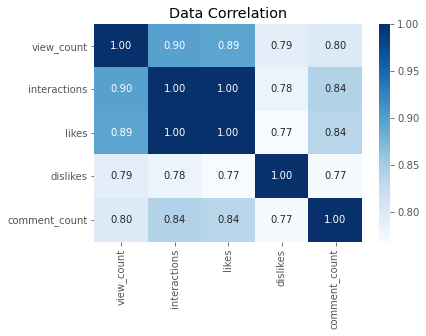

In [11]:
correlation(db)

## Primeira Pergunta

Queremos primeiro verificar se há uma relação entre o horário que os vídeos foram publicados e o sucesso do vídeo na plataforma entre os vídeos em trending.

Para isso vamos agrupar os vídeos pela hora de publicação, utilizando a informação de que a hora reside entre as posições 11 e 13 da string, e obter a média de visualizações entre os vídeos publicados por hora.

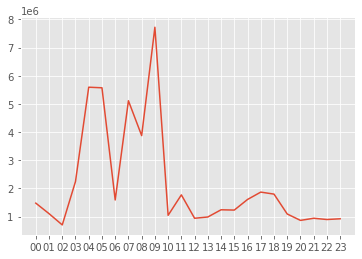

In [12]:
hour_mean = db.groupby(db.publishedAt.str[11:13])["view_count"].mean()

plt.plot(hour_mean)

In [13]:
fp = hour_mean[0:3]
sp = hour_mean[10:]
not_inc_mean = (fp.sum() + sp.sum()) / (fp.size + sp.size)

diff = hour_mean[3:10].mean() - not_inc_mean
ratio_diff = diff / not_inc_mean

print("As horas no pico tendem a performar {:.3}x melhor que os vídeos fora desse período".format(ratio_diff))

As horas no pico tendem a performar 2.75x melhor que os vídeos fora desse período


Temos que, mesmo adicionando os vídeos publicado às 6horas que performam a abaixo da média dos vídeos em horário de pico, os vídeos publicados entre 3 e 10 horas performam em média quase que três vezes melhor que os vídeos fora de horário de pico, o que nos leva a acreditar que há sim uma correlação entre o horário publicado e a performance do vídeo

# Segunda pergunta

Nosso segundo teste de hipótese busca identificar o impacto das tags no sucesso do vídeo dentro da plataforma.
Para isso nós parsearemos a lista de tags que possuímos no nosso banco de dados e analisaremos o sucesso de cada tag no sistema, com base nos vídeos que também a contém.

Em seguida, nós verificaremos qual a proporção de vídeos que performam acima da média dado que possuem uma determinada tag e analisaremos a diferença entre a média de visualizações de cada tag individualmente em comparação aos vídeos que não a possuem.

In [14]:
from operator import itemgetter 

def getAllTags (db: pd.DataFrame) -> dict:
    alltags = dict()
    for tags in db.tags:
        
        tags = tags.split("|")
        for tag in tags:
            if tag in alltags:
                alltags[tag] += 1
            else:
                alltags[tag] = 1
    return alltags

alltags = getAllTags(db)

alltags_sorted = sorted(alltags.items(), key=itemgetter(1), reverse=True)[ : 600 ]
alltags_wmean = dict()

total_average = db["view_count"].mean()

hl = np.array([[0, .0], [0, .0]])
rs = np.array([0, .0])

for tag, size in alltags_sorted:
    
    means = db.groupby(db.tags.str.contains(tag))["view_count"].mean()
    
    tags = [ tag, "Does Not Match", "Total Average" ]
    
    try: 
        means[1], means[0]
    except KeyError:
        continue
    
    means = [ 0 if means.size == 1 else means[1], means[0], total_average]
    
    # plt.bar(x = tags, height=means)
    # plt.show()
    
    hl[ 0 if means[0] >= total_average else 1, : ] += np.array([1, means[0]])
    rs += np.array([1, means[0] - means[1]])

/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [15]:
hl[0, 0]

124.0

In [16]:
higher = hl[0, 1] / hl[0, 0]
lower = hl[1, 1] / hl[1, 0]
ratio_diff = higher / total_average

print("Tags não parecem auxiliar no sucesso de um vídeo sozinhas dado que {0} tags performam acima da média geral e {1} abaixo".
     format(hl[0, 0], hl[1, 0], ratio_diff))

print("As tags que performam acima da média performam, em média, {:.3}x melhor que a média geral.".format(ratio_diff))

Tags não parecem auxiliar no sucesso de um vídeo sozinhas dado que 124.0 tags performam acima da média geral e 473.0 abaixo
As tags que performam acima da média performam, em média, 2.07x melhor que a média geral.


Essa análise de hipótese nos fez chegar a surpreendente conclusão de tags, individualmente, não interferem tanto no sucesso de um vídeo, com a maioria das tags performando de maneira negativa em relação a tag, entretanto, o grupo de tags que performa melhor que a média total, performa significantivamente melhor que a média, aproximadamente 2 vezes.
Isto pode apontar tanto que existem tags que influenciam na performance do vídeo na plataforma ou que determinados assuntos são mais procurados pela plataforma.

# Terceira Pergunta

Nós ficamos intrigados pelo resultado da pergunta anterior e resolvemos investigar o impacto da quantidade de tags no resultado dos vídeos publicados.

Para isso, vamos obter qual a média de visualizações dos vídeos agrupados pela quantidade de tags que eles expõe, e verificar sua correlação.

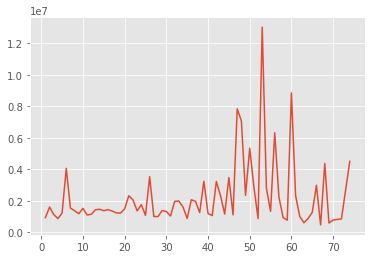

In [17]:
tag_mean = db.groupby(db.tags.str.split("|").str.len())["view_count"].mean()
sz = db.groupby(db.tags.str.split("|").str.len()).size()

plt.plot(tag_mean)

In [18]:
fp = tag_mean[0:38]
sp = tag_mean[62:]
not_inc_mean = (fp.sum() + sp.sum()) / (fp.size + sp.size)

diff = tag_mean[38:62].mean() - not_inc_mean
ratio_diff = diff / not_inc_mean

print("Vídeos com entre 40 e 60 tags tendem a performar {:.3}x melhor que os vídeos fora desse intervalo".format(ratio_diff))

Vídeos com entre 40 e 60 tags tendem a performar 1.19x melhor que os vídeos fora desse intervalo


A partir desse gráfico é possível chegar a conclusão que uma quantidade de tags em torno de 40-60 podem sim performar melhor que vídeos fora desse intervalo, entretanto, em média não observamos um resultado forte o suficiente para identificarmos uma correlação entre o número de tags e seu sucesso.

Isso reforça a conclusão da pergunta anterior de que tags individualmente não tem um poder de alanvancamento o suficiente para impulsionar o sucesso de um vídeo na plataforma.

# Quarta Pergunta

Em geral, os usuários do YouTube acessam a plataforma sempre em busca de vídeos específicos, sejam de música, conteúdo informativo ou gameplay de jogos. Esta divisão de categorias existe na classificação dos vídeos e, com uma percepção de usuário, é notável que algumas delas são recorrentes nos trendings da plataforma.<br>
Deste modo, a análise se torna relevante para averiguar, com uma percepção científica, o quanto se difere uma categoria da outra em relação ao número médio de visualizações.<br>
<br>
Qual a categoria de vídeo com o maior número de views dentre os trendings do youtube?<br>
**Hipótese Nula:** Independente da categoria do vídeo todos têm, aproximadamente, o mesmo número de views.

In [19]:
dj = pd.read_json("ytdaily/US_category_id.json")
n = dj["items"].count()
category = []
indice = []
for i in range(n):
    title = dj["items"][i]["snippet"]["title"]
    id_cat = int(dj["items"][i]["id"])
    category.append(title)
    indice.append(id_cat)
cat = pd.DataFrame({"categoryId": indice, "Category": category})
cat

,categoryId,Category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [20]:
new_db = db.groupby(["categoryId"]).mean()
new_db = new_db.reset_index()
new_db

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,interactions
0,1,1.544891e+06,84863.314088,1619.586605,5749.967667,0.000000,0.000000,86482.900693
1,2,3.054760e+05,34053.035264,277.078086,1759.229219,0.000000,0.000000,34330.113350
2,10,3.147671e+06,234845.984815,4866.101131,27485.200973,0.004565,0.001489,239712.085947
3,15,1.202775e+05,17954.000000,154.058824,862.411765,0.000000,0.000000,18108.058824
4,17,6.776024e+05,33452.522336,713.846203,2133.743140,0.000000,0.012444,34166.368539
5,19,1.917385e+05,18796.012346,362.703704,1088.617284,0.345679,0.061728,19158.716049
6,20,1.884874e+06,127486.128421,2284.038246,6382.492982,0.005263,0.001404,129770.166667
7,22,7.511230e+05,82155.185469,1102.678505,4088.859564,0.017409,0.009517,83257.863974
8,23,8.649991e+05,82819.008099,1328.654968,3167.062095,0.026458,0.000000,84147.663067
9,24,9.830380e+05,101359.852947,1434.284007,6171.481966,0.017003,0.001546,102794.136954


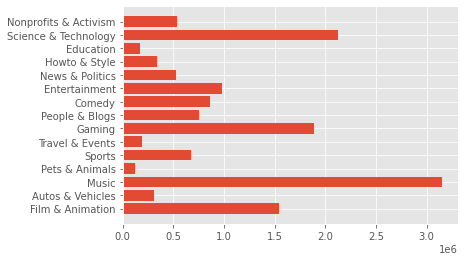

In [21]:
new_db = new_db.merge(cat, on="categoryId")
plt.barh(y = new_db["Category"], width=new_db["view_count"])
plt.show()

Com base nos resultados e no gráfico, foi possível notar que a percepção científica não foi diferente da percepção de usuário, já que a categoria com o maior número de visualizações médias foi a de Músicas. Sem nenhuma surpresa, logo em seguida vieram as categorias de Ciência e Tecnologia e a de Gaming. Apesar de a plataforma proibir vídeos de filmes e animações por questões de direitos autorais, a categoria ainda tem um alto número de visualizações, fato que se dá, provavelmente, pelo aluguel de filmes na plataforma e conteúdos feitos para o YouTube dentro das questões legais.

# Quinta pergunta

Com base nos resultados anteriores, ficou claro que os vídeos da categoria de Músicas têm o maior número de vizualizações médias. Com a percepção de usuário, as categorias de Esporte e Música são bastante frequentes nos trendings do YouTube, logo é interessante averiguar a possibilidade de ambas as categorias terem o mesmo número de visualizações.<br>
<br>
Qual a chance de um vídeo da categoria 'Sports' ter o mesmo número de views de um vídeo da categoria 'Music'?

In [22]:
def calcula_IC(df, target):
    mean = df[target].mean(axis = 0)
    std = df[target].std(axis = 0)
    n = df[target].count()
    xt = mean
    aux = (1.96*(std/(n**(1/2))))
    inferior = xt - aux
    superior = xt + aux
    
    return [ inferior, superior ]

intervalo_music = calcula_IC(db[db["categoryId"] == 10], "view_count")
intervalo_sport = calcula_IC(db[db["categoryId"] == 17], "view_count")
print(intervalo_music)
print(intervalo_sport)

[2958525.6331061013, 3336815.622153923]
[641295.2629986953, 713909.5627830534]


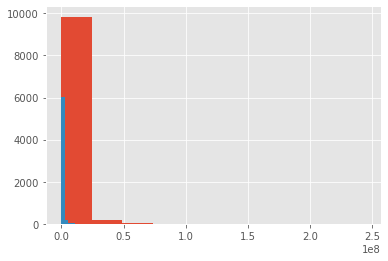

In [23]:
plt_db = db[db["categoryId"] == 10]
plt.hist(plt_db["view_count"], bins= 10)
plt_db = db[db["categoryId"] == 17]
plt.hist(plt_db["view_count"], bins= 10)
plt.show()

Através da análise, foi possível notar que não há uma interseção nos intervalos de confiança das duas categorias verificadas, isto é, cerca de 97,5% dos vídeos de música possuem mais vizualizações que 97,5% dos vídeos de esporte. Deste modo, a chance de um vídeo da categoria de Esportes ter o mesmo número de vizualizações de um da categoria Música é irrisória.

# Sexta Pergunta

Agora com base na nossa matriz de correlação gostaríamos de estabelecer um modelo de regressão linear entre a quantidade de interações, dado que a correlação entre interações e like é de quase um e interações também emglobam dislikes, e a quantidade de visualizações de um vídeo.<br>
<br>
É possível predizer a visualização de um vídeo a partir de suas interações?

86078.9170318474 11.83338872490196


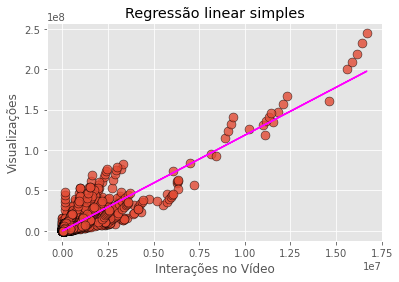

In [24]:
def error(alpha, beta, x, y):
    model = beta * x + alpha
    return y - model

def least_squares_fit(x, y):
    correlationxy = scipy.stats.pearsonr(x, y)[0]
    beta = correlationxy * np.std(y, ddof=1) / np.std(x, ddof=1)
    alpha = np.mean(y) - beta * np.mean(x)
    return alpha, beta

x = db['interactions'].values
y = db['view_count'].values
alpha, beta = least_squares_fit(x, y)
y_model = beta * x + alpha
plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x, y_model, color='magenta')
plt.xlabel('Interações no Vídeo')
plt.ylabel('Visualizações')
plt.title('Regressão linear simples')
print(alpha, beta)

In [25]:
def sum_of_squared_errors(alpha, beta, x, y):
    return (error(alpha, beta, x, y) ** 2).sum()

def total_sum_of_squares(y):
    return ((y - y.mean()) ** 2).sum()

def r_squared(alpha, beta, x, y):
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

In [26]:
print("O r2 de nosso modelo de regressão linear é ", r_squared(alpha, beta, x, y))

O r2 de nosso modelo de regressão linear é  0.8054557560690107


In [27]:
znormed = db[['interactions', 'view_count']].copy()
znormed = (znormed - znormed.mean()) / znormed.std(ddof=1)
x_normed = znormed['interactions'].values
y_normed = znormed['view_count'].values

Text(0.5, 1.0, 'Regressão linear simples com os dados normalizados')

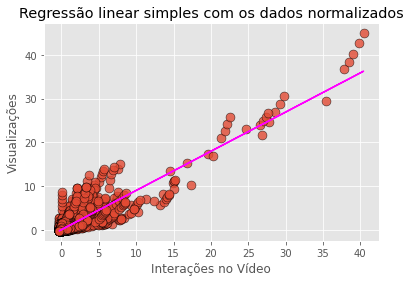

In [28]:
alpha, beta = least_squares_fit(x_normed, y_normed)
y_model = beta * x_normed + alpha
plt.scatter(x_normed, y_normed, alpha=0.8, edgecolors='k', s=80)
plt.plot(x_normed, y_model, color='magenta')
plt.xlabel('Interações no Vídeo')
plt.ylabel('Visualizações')
plt.title('Regressão linear simples com os dados normalizados')

In [29]:
print("O r2 de nosso modelo de regressão linear é com os dados normalizados", r_squared(alpha, beta, x_normed, y_normed))

O r2 de nosso modelo de regressão linear é com os dados normalizados 0.8054557560690107


Após a realizarmos o nosso modelo de regressão linear percebemos, a partir do nosso alfa e beta da regressão, que ele é muito bem sucedido para realizar uma predição. Podemos confirmar isso calculando o coeficiente de determinação (r2) do modelo, que gira em torno de 0.8. 